# George Ayobami Thomas - ME 5920 S25 Homework 1

## 1. Git Repository and Code Management

Repository link: https://github.com/Godd-hand/me5920

## 2. Simple Programming and Exploratory Analytics

## 2.1 Images

1. Download the MNIST dataset using the torchvision library and create a subset of the dataset containing 1,000 samples. Each sample will include a 28 × 28 pixel image, along with a single integer value denoting the sample’s respective class (number).
2. Plot a histogram of classes in your subset of MNIST.
3. Use the einops python package to ‘batch’ the subset of MNIST images. Each batch should contain 25 different samples. Hint: The subset of MNIST image data should change dimensions from [1000, 28, 28] → [Number of Batches, Batch Size, 1, 28, 28] Context: Deep learning models operate over batches of samples. This rapidly speeds up computation as the forward pass runs parallel across the batch dimension. Batching also can improve optimization and provides the S in SGD (Stochastic Gradient Descent). Additionally, neural networks expect a channel dimension for image data. MNIST is grayscale so it only contains one channel, but other images can contain color, in which case they will have three channels, RGB. Once you have completed this, Congrats! You’ve built your own dataloader!
4. Randomly select an MNIST image sample and, using Matplotlib, plot it in three dimensions. The x and y-axis’ should be the respective pixel locations, and the z-axis should be the pixel intensity

### 2.1.1 Downloading the MNIST Dataset and creating a subsset of 1000 samples 

In [1]:
# Importing all necessary packages 

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from einops import rearrange
from mpl_toolkits.mplot3d import Axes3D
import random


mnistDataset = datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True) # Downloading the MNIST dataset

mnistSubset = torch.utils.data.Subset(mnistDataset, range(1000))                                         # Creating a subset with 1000 smaples



### 2.1.2 Plotting a histogram of classes

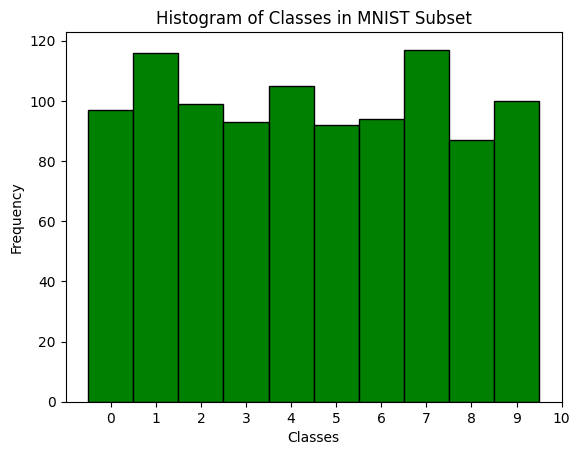

In [2]:
# Extracting the labels

labels = [label for _, label in mnistSubset]                                 # This list comprehension extracts the labels, ignores the images, and
                                                                             # stores the digits as label, then collects all label values into labels

plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor="black", color="green") # Since there are 10 labels, 11 bins are used and a shift of 0.5 units
                                                                             # helps center the class labels under each histogram bin 

plt.xticks(range(11))
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Histogram of Classes in MNIST Subset")
plt.show()


### 2.1.3 Using einops to batch the subset into 25 samples per batch

In [3]:
from einops import rearrange

images = torch.stack([img for img, _ in mnistSubset])            # Here, the dataset is converted into a tensor

print(f"Original Image Shape: {images.shape}")                   # Checking the original shape

batch = rearrange(images, "(b s) c h w -> b s c h w", s=25) 

# The hint given in the question is to ensure the dimensions change from [1000, 28, 28] to [Number of Batches, Batch Size, 1, 28, 28]

print(f"Batch Shape: {batch.shape}")                             # Verifying that the dimensions have changed.


Original Image Shape: torch.Size([1000, 1, 28, 28])
Batch Shape: torch.Size([40, 25, 1, 28, 28])


### 2.1.4 Plotting a randomly selected MNIST image sample

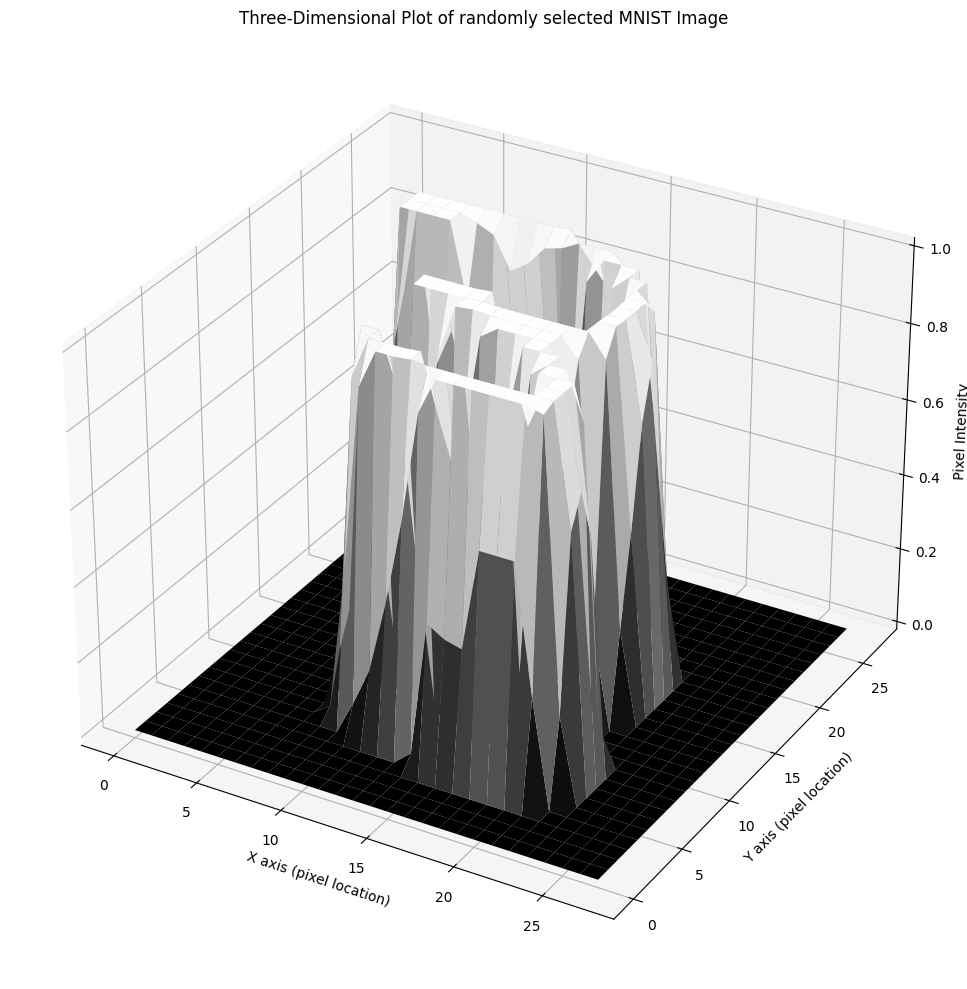

In [20]:

# Select a random image

randIndex = random.randint(0, len(mnistSubset) - 1)
image, _ = mnistSubset[randIndex]
image = image.squeeze()                                # Removing any dimensions of size 1 from the tensor


plot = plt.figure(figsize=(10, 10))                   
ax = plot.add_subplot(111, projection="3d")            # Creating a three-dimensional plot
x, y = np.meshgrid(range(28), range(28))               # Since we have 28 x 28 pixel images
ax.plot_surface(x, y, image.numpy(), cmap="gray")      # I used Gray here since MNIST is grayscale

ax.set_xlabel('X axis (pixel location)')
ax.set_ylabel('Y axis (pixel location)')
ax.set_zlabel('Pixel Intensity')
              
plt.title("Three-Dimensional Plot of randomly selected MNIST Image")
plt.tight_layout()
plt.show()


## 2.2 Time Series

Task: Load the data (energydata complete.csv) and perform the following analysis.

1. Plot the appliances energy consumption for whole period and a closer look at any
one week of consumption.
2. Plot heatmap of hourly consumption of appliances for a week. An example heatmap
looks like Figure 1.
3. Plot the histogram of energy consumption of appliances.
4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy
consumption vs. NSM.
5. Plot appliances energy consumption vs. Press mm Hg.
6. It is observed that the major contributing factors for the energy consumption
among all other features is NSM and Press mm Hg. Comment on it.

In [5]:
import pandas as pd

energy_data = pd.read_csv("./me5920/energydata_complete.csv", delimiter=",")

print("The shape is: ", energy_data.shape)  # To view the data I am working with
print(energy_data.head())

The shape is:  (19735, 29)
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH

### 2.2.1 Plotting the appliances energy consumption for the whole period, and then focusing on one week

#### Start by looking at the dates and seeing the range of dates

In [6]:
print(energy_data.date)

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
                ...         
19730    2016-05-27 17:20:00
19731    2016-05-27 17:30:00
19732    2016-05-27 17:40:00
19733    2016-05-27 17:50:00
19734    2016-05-27 18:00:00
Name: date, Length: 19735, dtype: object


#### Look at the appliances column and see the values 

In [7]:
print(energy_data.Appliances)

0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 19735, dtype: int64


#### Energy consumption for the whole period

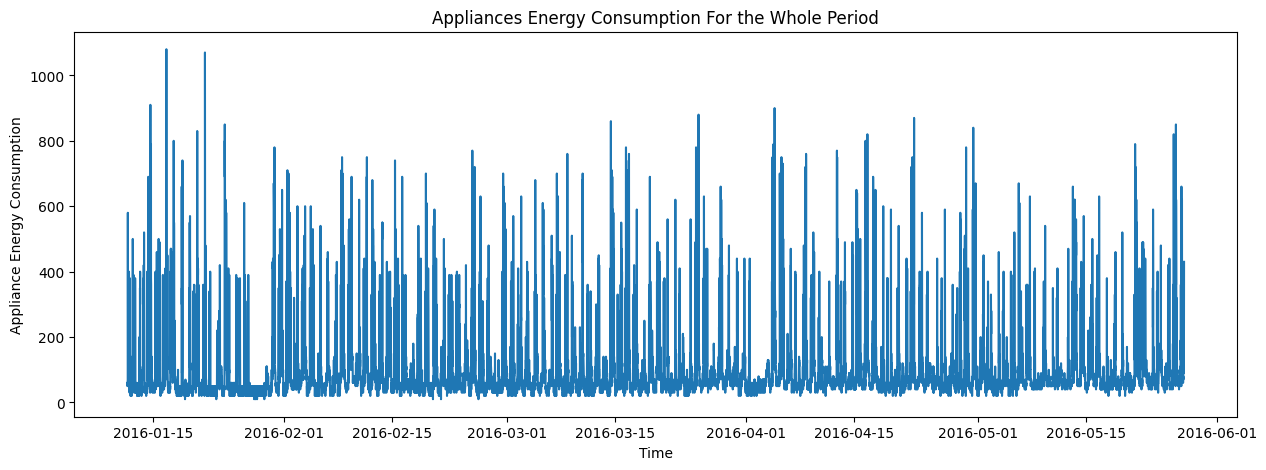

In [8]:
# Start by converting the date formats into pandas datetime object

energy_data["date"] = pd.to_datetime(energy_data["date"])
energy_data.set_index("date", inplace=True)                  # Here, I am setting the index of energy_data as "date"

plt.figure(figsize=(15, 5))
plt.plot(energy_data["Appliances"])
plt.title("Appliances Energy Consumption For the Whole Period")
plt.xlabel("Time")
plt.ylabel("Appliance Energy Consumption")
plt.show()


#### Energy consumption for a specific week

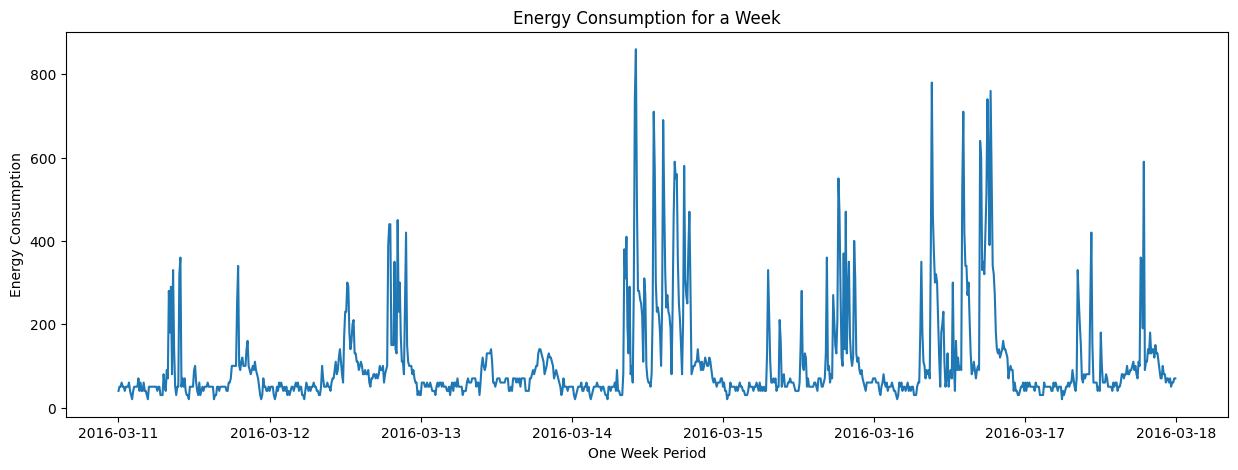

In [9]:
# Plot for one week
one_week = energy_data.loc["2016-03-11":"2016-03-17", "Appliances"]

plt.figure(figsize=(15, 5))
plt.plot(one_week)
plt.title("Energy Consumption for a Week")
plt.xlabel("One Week Period")
plt.ylabel("Energy Consumption")
plt.show()


### 2.2.2 Heatmap of hourly consumption of appliances for a week

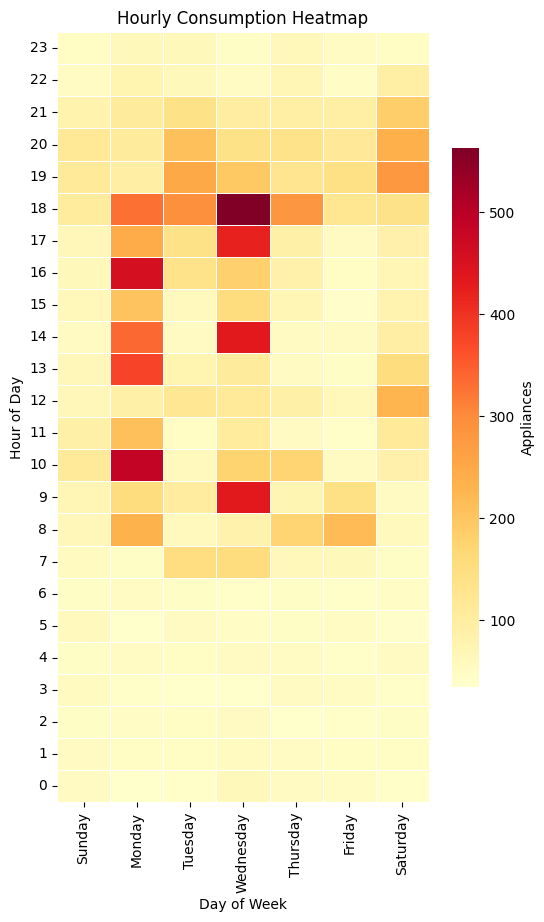

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the hour and day of the week from the energy data
energy_data["Hour"] = energy_data.index.hour
energy_data["Day_of_Week"] = energy_data.index.day_name()

# Extracting the data for a week
week_data = energy_data.loc["2016-03-11":"2016-03-17", ["Appliances", "Hour", "Day_of_Week"]]

# Pivot table to reshape for heatmap
week_heatmap = week_data.pivot_table(values="Appliances", index="Hour", columns="Day_of_Week")

# Reorder the columns to match the days of the week as seen in the example
week_heatmap = week_heatmap[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]

# Sort the index in descending order to start at 0 at the bottom
week_heatmap = week_heatmap.sort_index(ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(week_heatmap, cmap="YlOrRd", linewidths=0.5, cbar_kws={'label': 'Appliances', 'shrink': 0.7})
plt.title("Hourly Consumption Heatmap")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.yticks(rotation=0)
plt.show()


### 2.2.3 Histogram of Energy Consumption of Appliances

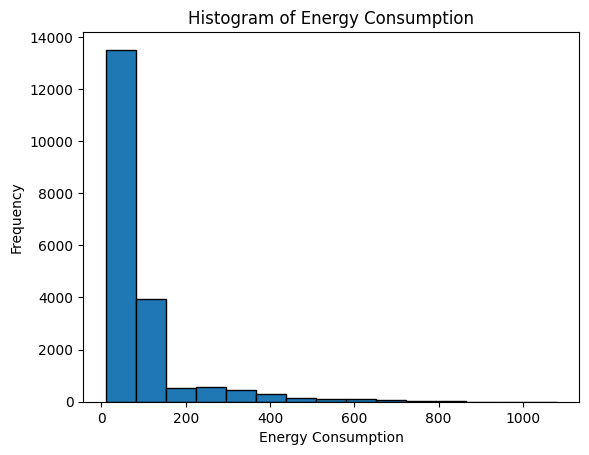

In [21]:
# Plotting the histogram

plt.hist(energy_data["Appliances"], bins=15 , edgecolor="black")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")                       # Histogram calculated based on Frequency of Energy Consumption
plt.title("Histogram of Energy Consumption")
plt.show()


### 2.2.4 Energy Consumption vs NSM

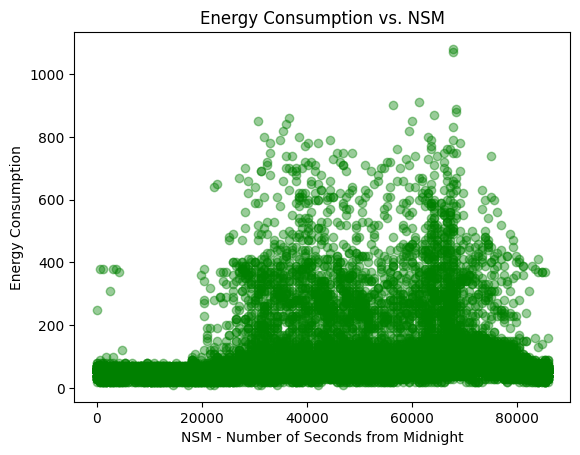

In [26]:
# Create Number of Seconds from Midnight (NSM)

energy_data["NSM"] = energy_data.index.hour * 3600 + energy_data.index.minute * 60    # Hour is converted to seconds, then added to Minutes converted to seconds also

plt.scatter(energy_data["NSM"], energy_data["Appliances"], alpha=0.4, color="green")  # Scatter plot is good to view relationships for correlations
plt.xlabel("NSM - Number of Seconds from Midnight")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption vs. NSM")
plt.show()


### 2.2.5 Appliances energy consumption vs Press mm Hg

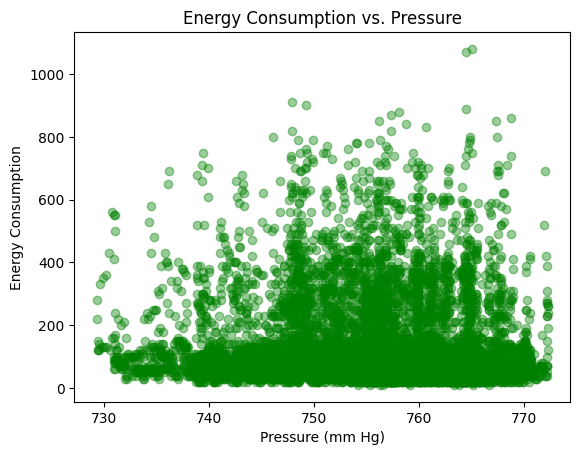

In [27]:
# Energy Consumption vs Pressure

plt.scatter(energy_data["Press_mm_hg"], energy_data["Appliances"], alpha=0.4, color="green")
plt.xlabel("Pressure (mm Hg)")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption vs. Pressure")
plt.show()


### 2.2.6 Comment on the relationship between the energy consumption, NSM and Press_mm_Hg

#### Energy Consumption vs NSM

From the scatterplot of Energy vs NSM, the energy consumption increases exponentially after about 20000 seconds from midnight and it continues to climb throughout the day, peaking at about 70000 seconds from midnight, then gradually declining. This would suggest that energy consumption increases alongside the periods of human activity after waking up. We can see a relatively stable "baseline" energy consumption of about 100 units between midnight and about 20000 seconds from midnight. This represents the sleeping hours, where most individuals are asleep and the energy consumption is lower. 

#### Energy Consumption vs Pressure

Although the correlation is not very distinct, the scatter plot above reveals that the energy consumption increases from a baseline of about 200 units to about 400 units when the pressure hits 740 mmHg or higher. We can see denser points between 745 mmHg and 765 mmHg and this shows the intensity of energy consumed at that pressure range. 

Further, the energy consumption rises occassionally regardless of the pressure, but it is clear that the highest magnitudes of energy consumption were recorded when the pressure is equal to, or higher than 740 mmHg, with the highest energy consumption recorded at about 765 mmHg.

## 2.3 Multi-variate

Data: The NASA data set comprises different sizes of NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments. This problem has the following inputs:
1. Frequency, in Hz.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness in meters.

The only output is a Scaled sound pressure level in decibels. 

Task: Load the data and Compute the following descriptive statistics of the data:

1. Mean
2. Variance (or Standard Deviation)
3. Median
4. Kurtosis
5. Skewness
6. Range

In [14]:
airfoil_data = pd.read_csv("./me5920/airfoil_self_noise.dat", delimiter="\t", header=None)

print("The shape is:", airfoil_data.shape)             # To view the data I am working with
print(airfoil_data.head())


The shape is: (1503, 6)
      0    1       2     3         4        5
0   800  0.0  0.3048  71.3  0.002663  126.201
1  1000  0.0  0.3048  71.3  0.002663  125.201
2  1250  0.0  0.3048  71.3  0.002663  125.951
3  1600  0.0  0.3048  71.3  0.002663  127.591
4  2000  0.0  0.3048  71.3  0.002663  127.461


In [15]:
'''From the website containing the dataset, the variable names were given, so I replaced the column headers 
   of 0, 1, 2, 3, 4, 5 with the original variable names '''

airfoil_data.columns = ["Frequency", "Angle", "Chord_Length", "Velocity", "Displacement", "Sound_Level"] 

print(airfoil_data.head())          # To verify the change has been made

   Frequency  Angle  Chord_Length  Velocity  Displacement  Sound_Level
0        800    0.0        0.3048      71.3      0.002663      126.201
1       1000    0.0        0.3048      71.3      0.002663      125.201
2       1250    0.0        0.3048      71.3      0.002663      125.951
3       1600    0.0        0.3048      71.3      0.002663      127.591
4       2000    0.0        0.3048      71.3      0.002663      127.461


### 2.3.1 Descriptive statistics

In [28]:
from scipy.stats import skew
from scipy.stats import kurtosis

mean = airfoil_data.mean()
var = airfoil_data.var()
stdDev = airfoil_data.std()
median = airfoil_data.median()
kutorsis = airfoil_data.apply(kurtosis)
skew = airfoil_data.apply(skew)
dataRange = airfoil_data.max() - airfoil_data.min()


''' Instead of viewing each descriptive statistics, I elect to take advantage of the pandas dataframe by 
    storing the variables in a dictionary and viewing them all at once
'''

des_stats = {"Mean": mean, "Variance": var, "Standard_Deviation": stdDev, "Kutorsis": kutorsis, "Skewness": skew, "Range": dataRange}
stats = pd.DataFrame(des_stats)

print(stats)


                     Mean      Variance  Standard_Deviation  Kutorsis  \
Frequency     2886.380572  9.938717e+06         3152.573137  5.685722   
Angle            6.782302  3.502424e+01            5.918128 -0.415568   
Chord_Length     0.136548  8.749868e-03            0.093541 -1.038504   
Velocity        50.860745  2.425116e+02           15.572784 -1.562743   
Displacement     0.011140  1.729287e-04            0.013150  2.207539   
Sound_Level    124.835943  4.759146e+01            6.898657 -0.317132   

              Skewness         Range  
Frequency     2.134951  19800.000000  
Angle         0.688476     22.200000  
Chord_Length  0.457001      0.279400  
Velocity      0.235617     39.600000  
Displacement  1.700465      0.058011  
Sound_Level  -0.418534     37.607000  


#### References

1. https://github.com/LuisM78/Appliances-energy-prediction-data
2. Data driven prediction models of energy use of appliances in a low-energy house.
Luis M. Candanedo, V´eronique Feldheim, Dominique Deramaix. Energy and Builings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788
3. https://archive.ics.uci.edu/dataset/291/airfoil+self+noise
4. T.F. Brooks, D.S. Pope, and A.M. Marcolini. Airfoil self-noise and prediction.
Technical report, NASA RP-1218, July 1989